NIKE V/S ADIDAS: This dataset is taken from kaggle. This dataset consists of 3268 rows and 10 columns. This contains information like the product's name,ID, listing Price, sales price, discount, brand name, description, ratings and reviews. This helps us to compare betwen the two brands. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv(r"C:\Users\NILANSHU\Desktop\Python\nike vs addidas minor project\Adidas Vs Nike.csv\Adidas Vs Nike.csv")
df

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15
...,...,...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13T15:41:01
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,2020-04-13T15:41:03
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,The soft upper of the Nike Mercurial Superfly ...,5.0,1,2020-04-13T15:41:07
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,2020-04-13T15:41:19


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Description    3265 non-null   object 
 7   Rating         3268 non-null   float64
 8   Reviews        3268 non-null   int64  
 9   Last Visited   3268 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 255.4+ KB


In [7]:
df.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


In [9]:
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())


Summary Statistics:
       Listing Price    Sale Price     Discount       Rating      Reviews
count    3268.000000   3268.000000  3268.000000  3268.000000  3268.000000
mean     6868.020196   6134.265606    26.875765     3.242105    40.551714
std      4724.659386   4293.247581    22.633487     1.428856    31.543491
min         0.000000    449.000000     0.000000     0.000000     0.000000
25%      4299.000000   2999.000000     0.000000     2.600000    10.000000
50%      5999.000000   4799.000000    40.000000     3.500000    37.000000
75%      8999.000000   7995.000000    50.000000     4.400000    68.000000
max     29999.000000  36500.000000    60.000000     5.000000   223.000000

Missing Values:
Product Name     0
Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand            0
Description      3
Rating           0
Reviews          0
Last Visited     0
dtype: int64


In [11]:
# Encode categorical variables if necessary
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [13]:
# Split features and target variable
y = df.iloc[:, -1]  # Assuming last column is target
X = df.iloc[:, :-1]


In [15]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0.5, 1.0, 'Histogram of Feature 1')

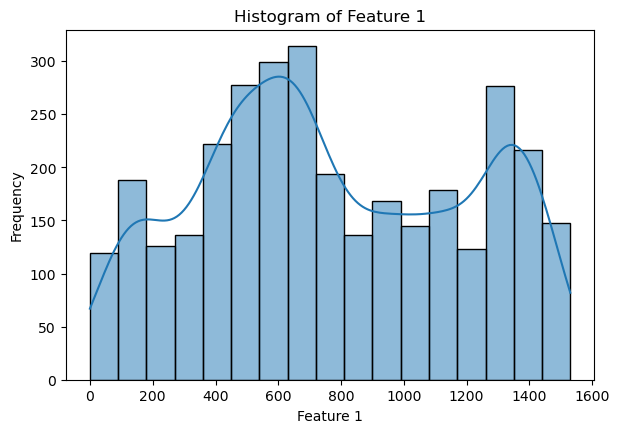

In [19]:
# Histogram of first numerical column
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
sns.histplot(df.iloc[:, 0], kde=True)
plt.xlabel('Feature 1')
plt.ylabel('Frequency')
plt.title('Histogram of Feature 1')

Text(0.5, 1.0, 'Boxplot of Feature 1')

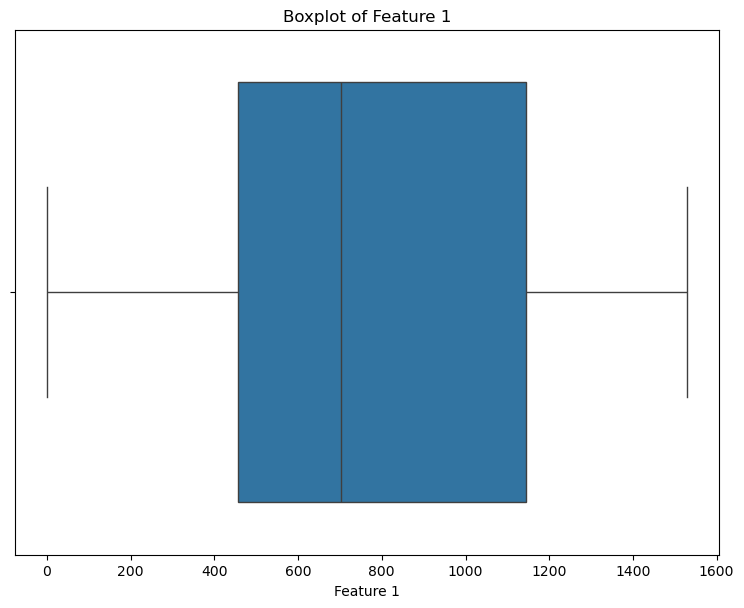

In [21]:
# Boxplot of first numerical column
plt.figure(figsize=(20,15))
plt.subplot(2, 2, 2)
sns.boxplot(x=df.iloc[:, 0])
plt.xlabel('Feature 1')
plt.title('Boxplot of Feature 1')

Text(0.5, 1.0, 'Feature 1 vs Feature 2')

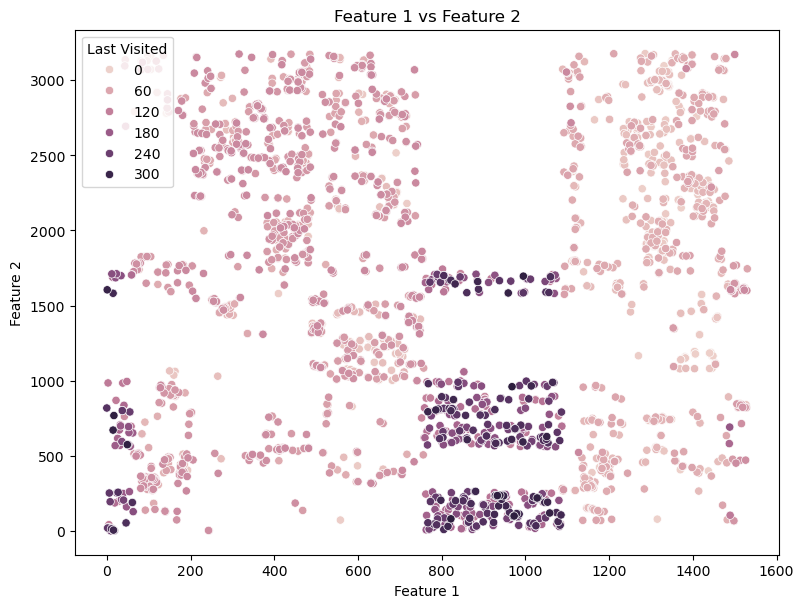

In [23]:
# Scatter plot of first two numerical features
plt.figure(figsize=(20,15))
plt.subplot(2, 2, 3)
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Feature 1 vs Feature 2')

Text(0.5, 1.0, 'Correlation Heatmap')

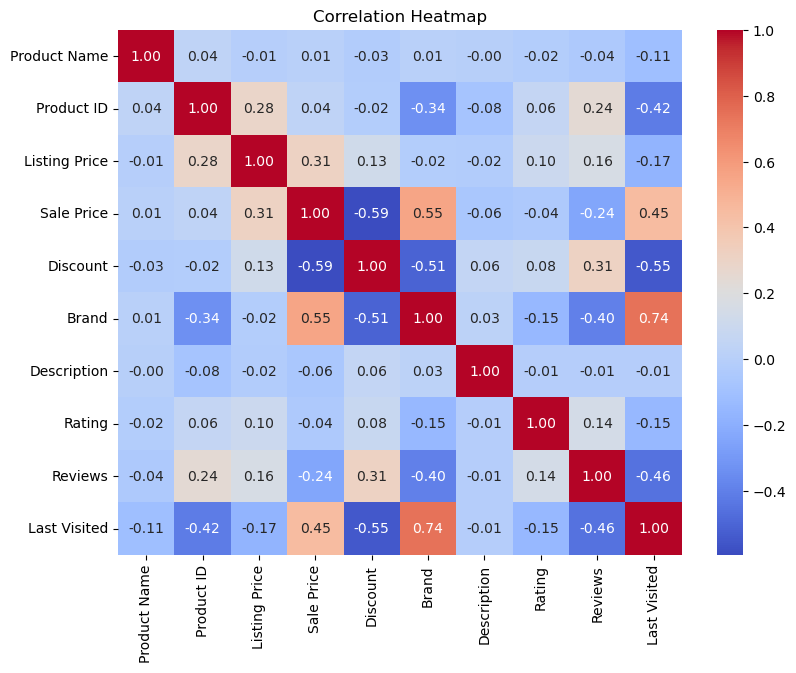

In [25]:
# Correlation heatmap
plt.figure(figsize=(20,15))
plt.subplot(2, 2, 4)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

In [27]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC()
}

# Train and Evaluate Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model: Logistic Regression
Accuracy: 0.0703
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00         9
          17

C:\Users\NILANSHU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NILANSHU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NILANSHU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NILANSHU\anaconda3\Lib\site-pa


Model: Random Forest
Accuracy: 0.1850
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.50      0.50      0.50         2
           4       0.43      0.75      0.55         4
           5       1.00      0.17      0.29         6
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.17      0.33      0.22         3
          10       0.67      0.67      0.67         6
          11       0.20      0.14      0.17         7
          12       0.20      0.15      0.17        13
          13       0.00      0.00      0.00         5
          14       0.25      0.18      0.21        11
          15       0.00      0.00      0.00         7
          16      

C:\Users\NILANSHU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NILANSHU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NILANSHU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NILANSHU\anaconda3\Lib\site-pa


Model: Gradient Boosting
Accuracy: 0.0153
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.06      0.75      0.12         4
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00         5
          14       0.12      0.09      0.11        11
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00         9
          17  

C:\Users\NILANSHU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NILANSHU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NILANSHU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model: Support Vector Machine
Accuracy: 0.0948
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00         7
          16       1.00      0.11      0.20         9
         

C:\Users\NILANSHU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NILANSHU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NILANSHU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NILANSHU\anaconda3\Lib\site-pa